In [21]:
%pylab inline
import pymc

Populating the interactive namespace from numpy and matplotlib


In [22]:
2+6

8

In [23]:
pymc.test()

EE....

Running unit tests for pymc.tests
NumPy version 1.10.1
NumPy relaxed strides checking option: True
NumPy is installed in C:\Anaconda3\lib\site-packages\numpy
Python version 3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Dec  7 2015, 15:00:12) [MSC v.1900 64 bit (AMD64)]
nose version 1.3.7
Could not generate output statistics for

...F.E............EEEEEEEE.............S..........C:\Anaconda3\lib\site-packages\pymc\tests\test_database.py:449: ResourceWarning: unclosed file <_io.TextIOWrapper name='testresults/interactivesqlite.log' mode='w' encoding='cp1252'>
  progress_bar=0)
.......F............................................................E........................

 early_mean
Could not generate output statistics for rate
Could not generate output statistics for early_mean
Could not generate output statistics for late_mean
Could not generate output statistics for switchpoint
0            x
1    (x_pow_2)
dtype: object

.....SSEC:\Anaconda3\lib\site-packages\pymc\tests\test_interactive.py:22: ResourceWarning: unclosed file <_io.TextIOWrapper name='testresults/interactive.log' mode='w' encoding='cp1252'>
  progress_bar=0)
....E..

EEE
ERROR: Failure: DeprecationWarning (inspect.getargspec() is deprecated, use inspect.signature() instead)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\nose\failure.py", line 39, in runTest
    raise self.exc_val.with_traceback(self.tb)
  File "C:\Anaconda3\lib\site-packages\nose\loader.py", line 418, in loadTestsFromName
    addr.filename, addr.module)
  File "C:\Anaconda3\lib\site-packages\nose\importer.py", line 47, in importFromPath
    return self.importFromDir(dir_path, fqname)
  File "C:\Anaconda3\lib\site-packages\nose\importer.py", line 94, in importFromDir
    mod = load_module(part_fqname, fh, filename, desc)
  File "C:\Anaconda3\lib\imp.py", line 234, in load_module
    return load_source(name, filename, file)
  File "C:\Anaconda3\lib\imp.py", line 172, in load_source
    module = _load(spec)
  File "<frozen importlib._bootstrap>", line 693, in _load
  File "<frozen importl

<nose.result.TextTestResult run=167 errors=17 failures=2>

In [24]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform
import numpy as np

In [25]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [26]:
disasters_array


array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
       4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [27]:
switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110, doc='Switchpoint[year]')

In [28]:
from pymc.examples import disaster_model
from pymc import MCMC
M = MCMC(disaster_model)

In [29]:
M.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.6 sec

In [30]:
M.trace('switchpoint')[:]

array([36, 36, 36, 36, 36, 39, 41, 38, 41, 37, 38, 36, 40, 44, 39, 36, 43,
       46, 40, 43, 40, 41, 39, 41, 42, 41, 38, 36, 39, 38, 42, 36, 41, 39,
       37, 37, 46, 39, 36, 36, 38, 37, 46, 37, 40, 40, 37, 41, 38, 43, 40,
       43, 46, 39, 40, 40, 40, 39, 44, 46, 39, 41, 40, 36, 42, 38, 40, 40,
       42, 37, 40, 37, 41, 42, 40, 40, 42, 42, 36, 42, 42, 46, 39, 37, 41,
       41, 40, 36, 46, 39, 36, 39, 41, 37, 39, 37, 41, 41, 37, 42, 41, 41,
       40, 40, 40, 41, 43, 37, 41, 40, 37, 37, 42, 39, 40, 39, 39, 41, 42,
       37, 38, 37, 40, 41, 39, 41, 41, 37, 37, 41, 41, 40, 36, 41, 44, 40,
       46, 37, 42, 36, 37, 36, 41, 37, 40, 46, 43, 39, 37, 42, 42, 38, 41,
       36, 39, 39, 41, 40, 37, 41, 40, 40, 40, 46, 36, 36, 37, 41, 43, 41,
       37, 36, 42, 36, 37, 37, 41, 41, 37, 40, 43, 37, 41, 39, 41, 42, 44,
       38, 41, 40, 40, 41, 41, 40, 39, 44, 45, 36, 36, 40, 43, 40, 41, 41,
       36, 39, 46, 40, 39, 39, 39, 42, 43, 46, 35, 35, 41, 33, 36, 40, 44,
       39, 40, 43, 41, 36

(array([   2.,   22.,   71.,  152.,  185.,  206.,  143.,   75.,   33.,   11.]),
 array([ 0.58679203,  0.65650776,  0.72622348,  0.79593921,  0.86565493,
         0.93537066,  1.00508638,  1.07480211,  1.14451783,  1.21423356,
         1.28394928]),
 <a list of 10 Patch objects>)

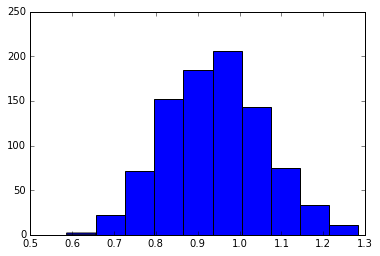

In [31]:
from pylab import hist, show
hist(M.trace('late_mean')[:])

In [33]:
show()